# DB Project, Data Visualization #2
## Exploratory data analysis

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import warnings
warnings.filterwarnings('ignore')
from shapely import wkt

df = pd.read_csv('../intermediate_data/df_geospatial_to_graph.csv')
df['geometry'] = df['geometry'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(df, crs='epsg:2263')
#crs = {'init': 'epsg:3857'} #http://www.spatialreference.org/ref/epsg/2263/
#geo_df = GeoDataFrame(df, crs=crs)

In [22]:
# Describing data shape.

gdf.shape

(59093, 32)

In [23]:
# Pulling random data point.

gdf.iloc[1213]

Unnamed: 0                                                          7067
beat                                                                   1
beat_num                                                            2411
district                                                              24
sector                                                                 1
geometry               (POLYGON ((-87.68860769894629 42.0195227296845...
Year                                                                2015
Month                                                                 10
Watch                                                              Third
Beat                                                                2411
Crimes                                                                27
Serious                                                             13.0
Arrest                                                                 2
Domestic                                           

In [29]:
# Pulling first 5 rows.

gdf.head()

,Unnamed: 0,beat,beat_num,district,sector,geometry,Year,Month,Watch,Beat,...,count_restaurants,count_bars,count_daycares,count_entertainment,count_businesses,road_distance_ft,TOTAL POPULATION,dist_to_police,dist_to_hospital,high_crime_geog_lag
0,0,1,1713,17,1,"MULTIPOLYGON (((-87.70473 41.97577, -87.70472 ...",2015,1,Third,1713,...,63.0,9.0,6.0,1.0,92.0,169276.405792,13283.675264,5454.06889,3258.006066,0.155378
1,1,1,1713,17,1,"MULTIPOLYGON (((-87.70473 41.97577, -87.70472 ...",2015,1,Second,1713,...,63.0,9.0,6.0,1.0,92.0,169276.405792,13283.675264,5454.06889,3258.006066,0.155378
2,2,1,1713,17,1,"MULTIPOLYGON (((-87.70473 41.97577, -87.70472 ...",2015,1,First,1713,...,63.0,9.0,6.0,1.0,92.0,169276.405792,13283.675264,5454.06889,3258.006066,0.155378
3,3,1,1713,17,1,"MULTIPOLYGON (((-87.70473 41.97577, -87.70472 ...",2015,2,Second,1713,...,63.0,9.0,6.0,1.0,92.0,169276.405792,13283.675264,5454.06889,3258.006066,0.155378
4,4,1,1713,17,1,"MULTIPOLYGON (((-87.70473 41.97577, -87.70472 ...",2015,2,Third,1713,...,63.0,9.0,6.0,1.0,92.0,169276.405792,13283.675264,5454.06889,3258.006066,0.155378


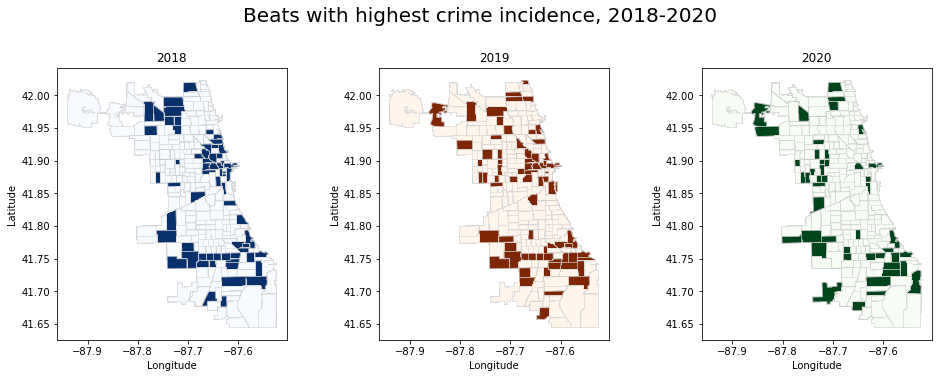

In [56]:
f, axes = plt.subplots(1,3, figsize=(16, 5))
f.subplots_adjust(wspace=0.3, hspace=2)
f.suptitle('Beats with highest crime incidence, 2018-2020', y=1.05,  fontsize=20)

gdf_2018 = gdf[gdf['Year']==2018]
gdf_2018.plot(column = 'high_crime', cmap='Blues', ax = axes[0], linewidth=0.5, edgecolor = '0.85')

gdf_2019 = gdf[gdf['Year']==2019]
gdf_2019.plot(column = 'high_crime', cmap='Oranges', ax = axes[1], linewidth=0.5, edgecolor = '0.85')

gdf_2020 = gdf[gdf['Year']==2020]
gdf_2020.plot(column = 'high_crime', cmap='Greens', ax = axes[2], linewidth=0.5, edgecolor = '0.85')

axes[0].set_ylabel('Latitude')
axes[0].set_xlabel('Longitude')
axes[0].set_title('2018')
axes[0].set_aspect(1.3)
axes[1].set_ylabel('Latitude')
axes[1].set_xlabel('Longitude')
axes[1].set_title('2019')
axes[1].set_aspect(1.3)
axes[2].set_ylabel('Latitude')
axes[2].set_xlabel('Longitude')
axes[2].set_title('2020')
axes[2].set_aspect(1.3)